In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
df = pd.read_csv('data/A_Z Handwritten Data.csv')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info(), print('Col[0] is alphabets and Col[1:] is features 784 pixels')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB
Col[0] is alphabets and Col[1:] is features 784 pixels


(None, None)

In [4]:
y = df['0']
x = df.drop('0', axis = 1)

In [5]:
# choose value of 1st row and reshape it to (1, 28, 28) to display
a = np.reshape(x.iloc[:1].values, (28, 28))
a.shape

(28, 28)

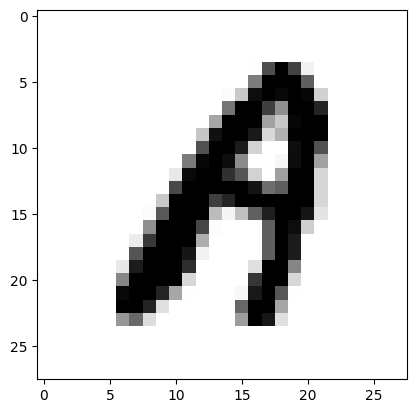

In [6]:
# display img
plt.imshow(
    a,
    cmap = plt.cm.binary,
    interpolation = 'nearest')
plt.show()

In [82]:
word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',
    5:'F',6:'G',7:'H',8:'I',9:'J',
    10:'K',11:'L',12:'M',13:'N',14:'O',
    15:'P',16:'Q',17:'R',18:'S',19:'T',
    20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

In [37]:
from sklearn.model_selection import train_test_split

# train : 70, val : 20, test : 10
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.3)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.3)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_val = np.reshape(x_val.values, (x_val.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

In [38]:
x_train.shape, x_val.shape, x_test.shape

((260715, 28, 28), (78214, 28, 28), (33521, 28, 28))

In [39]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] , x_train.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] , x_test.shape[2], 1)
x_train.shape, x_val.shape, x_test.shape

((260715, 28, 28, 1), (78214, 28, 28, 1), (33521, 28, 28, 1))

In [40]:
from keras.utils.np_utils import to_categorical

# y(0-25) is represent different categories
# convert y to numpy array which has binary values
categorical_train = to_categorical(y_train, num_classes = 26, dtype = 'int')
categorical_val = to_categorical(y_val, num_classes = 26, dtype = 'int')
categorical_test = to_categorical(y_test, num_classes = 26, dtype = 'int')
categorical_train.shape, categorical_val.shape, categorical_test.shape

((260715, 26), (78214, 26), (33521, 26))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

model = Sequential()

# convolution
# feature map with 3*3 kernel and max pool with 2*2 stride 2
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

# turn to 1D val
model.add(Flatten())

# hidden layer
model.add(Dense(64, activation = "relu"))
model.add(Dense(128, activation = "relu"))

# output A-Z = 26
model.add(Dense(26, activation = "softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# history = model.fit(x_train, categorical_train, epochs = 3, validation_data = (x_val, categorical_val))

Epoch 1/3
8148/8148 [==============================] - 194s 24ms/step - loss: 0.1642 - accuracy: 0.9549 - val_loss: 0.0933 - val_accuracy: 0.9730
Epoch 2/3
8148/8148 [==============================] - 192s 24ms/step - loss: 0.0749 - accuracy: 0.9792 - val_loss: 0.0607 - val_accuracy: 0.9833
Epoch 3/3
8148/8148 [==============================] - 201s 25ms/step - loss: 0.0644 - accuracy: 0.9824 - val_loss: 0.0682 - val_accuracy: 0.9816


In [36]:
# history.history['accuracy'][0]

0.9549278020858765

In [18]:
from tensorflow.keras.models import load_model
# model.save('data/handwriting_recog.h5')

In [101]:
# model = load_model('data/handwriting_recog.h5')

In [97]:
def pred_alpha(vec):
    # vec.shape is (28, 28, 1)
    # model was trained by (x, 28, 28, 1) so we must add 1 more dimension to vec
    n_vec = vec.reshape(1, vec.shape[0], vec.shape[1], vec.shape[2])
    pred = model.predict(n_vec)
    # argmax to find index of the most likely val then find the alphabet with word_dict by key
    ans = word_dict[np.argmax(pred)]
    print('Prediction : ', ans)
    plt.imshow(vec)
    plt.show

1/1 [==============================] - 0s 18ms/step
Prediction :  U
Answer :  U


(None, None)

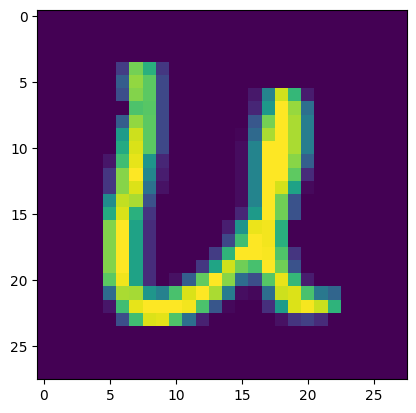

In [100]:
nn = 99
pred_alpha(x_test[nn]), print('Answer : ', word_dict[np.argmax(categorical_test[nn])])